# Analysis of `alarm_violations.csv` for Respiratory Rate

For each parameter ...
* Concerning alarm violations ...
  * Create a boxplot and stripplot based on the VALUENUM
  * Clean the data if necessary
  * Create histogram for cleaned VALUENUM  
* Concerning alarm thresholds ...
  * Create a boxplot and stripplot based on the THRESHOLD_VALUE (stratified by THRESHOLD_TYPE)
  * Clean the data if necessary
  * Create histogram for cleaned THRESHOLD_VALUE (stratified by THRESHOLD_TYPE)


## Import Data

In [1]:
# Overview of libraries used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alarm_violations = pd.read_csv('./alarm_violations.csv')
alarm_violations.head()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
0,188506,262147.0,220045,2108-02-21 19:00:00,127.0,bpm,188397,220046,2108-02-21 07:00:00,120.0,HIGH
1,188690,262147.0,220277,2108-02-22 03:55:00,89.0,%,188518,223770,2108-02-21 19:34:00,90.0,LOW
2,188742,262147.0,220277,2108-02-22 07:00:00,87.0,%,188723,223770,2108-02-22 04:22:00,88.0,LOW
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
4,32060004,262154.0,224687,2105-12-09 00:30:00,3.0,L/min,32059994,220292,2105-12-09 00:30:00,3.5,LOW


## Parameter: Respiratory Rate (Number of Breaths per Minute)

* `220210` **Respiratory Rate** (RR), metavision, in insp/min (numeric)
* `224161` **Resp Alarm - High** (Resp Alarm - High), metavision, in insp/min (numeric)
* `224162` **Resp Alarm - Low** (Resp Alarm - Low), metavision, in insp/min (numeric)

### Respiratory Rate - Alarm Violations

In [3]:
RR_violations = alarm_violations[(alarm_violations['ITEMID'] == 220210)]
display(RR_violations)

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
74,32059616,262154.0,220210,2105-12-08 05:15:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
75,32059622,262154.0,220210,2105-12-08 05:20:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
76,32059628,262154.0,220210,2105-12-08 05:25:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
77,32059857,262154.0,220210,2105-12-08 21:15:00,7.0,insp/min,32059819,224162,2105-12-08 20:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


In [4]:
RR_violations.VALUENUM.describe()

count    7.086100e+04
mean     5.831980e+01
std      8.848886e+03
min      0.000000e+00
25%      7.000000e+00
50%      3.100000e+01
75%      3.600000e+01
max      2.355555e+06
Name: VALUENUM, dtype: float64

<AxesSubplot:>

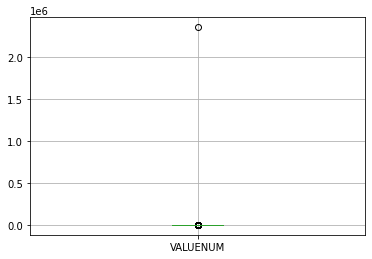

In [5]:
RR_violations.boxplot(column='VALUENUM')

Among the VALUENUM values is a maximum respiratory rate of 2.355.555 insp/min.
This appears to be at least one implausible outlier.

Let's check whether the unit (VALUEUOM) is "insp/min" for all respiratory rates (what is expected according to `D_ITEMS.csv`).

In [6]:
RR_violations.VALUEUOM.unique()

array(['insp/min'], dtype=object)

All respiratory rates are given in insp/min as expected.

Let's check the literature to see what respiratory rates can be expected based on medical knowledge.

* General range:
    * for adults: 12 to 20 insp/min
    * much higher for kids, especially for babies under 2 years (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3789232/figure/F2/)
* Abnormal values for adults: (https://onlinelibrary.wiley.com/doi/full/10.5694/j.1326-5377.2008.tb01825.x?casa_token=UjZimsSmcVIAAAAA%3A2cMU2S0v9D15Mx72WCOms4LbCztCJ0_TnZIheDI-qZ8x8a0VU7HWBRs6TTv9SGoqfHC0fSf5ctnduwA&sid=nlm%3Apubmed)
    * varies from over 14 to over 36 insp/min
    * over 20 insp/min = probably unwell
    * over 24  insp/min = likely to be critically ill
* Maximum Breathing Capacity (MBC):
    * "...has been determined with various expiratory and respiratory resistances (singly and combined) at breathing rates of 4–196 per minute." (https://journals.physiology.org/doi/abs/10.1152/jappl.1957.11.1.79)

Decision for now: Consider respiratory rates over 196 insp/min as implausible values to be removed before further analysis.

In [7]:
RR_violations_clean = RR_violations[RR_violations['VALUENUM'] <= 196]

RR_violations_too_high = RR_violations[(RR_violations['VALUENUM'] > 196)]
len(RR_violations_too_high) # 41 entries were removed

41

In [8]:
display(RR_violations_too_high.sort_values(by=['VALUENUM']))
RR_violations_too_high.VALUENUM.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
76967,14850108,283401.0,220210,2146-09-23 06:00:00,197.0,insp/min,14849931,224161,2146-09-22 20:15:00,30.0,HIGH
7756,27053804,264596.0,220210,2141-10-03 13:30:00,200.0,insp/min,27053655,224161,2141-10-03 12:17:00,35.0,HIGH
361026,21650,256064.0,220210,2166-01-20 19:10:00,200.0,insp/min,21504,224161,2166-01-20 08:10:00,30.0,HIGH
41635,32240162,274209.0,220210,2157-05-23 19:00:00,200.0,insp/min,32240011,224161,2157-05-23 08:00:00,30.0,HIGH
319811,16790183,245558.0,220210,2135-08-19 22:00:00,200.0,insp/min,16790164,224161,2135-08-19 20:33:00,30.0,HIGH
98162,27737501,289476.0,220210,2103-09-30 00:00:00,200.0,insp/min,27737473,224161,2103-09-29 20:00:00,35.0,HIGH
10290,30635389,265425.0,220210,2197-06-28 04:00:00,210.0,insp/min,30635204,224161,2197-06-27 20:00:00,35.0,HIGH
305548,27834103,241314.0,220210,2161-08-24 16:15:00,220.0,insp/min,27834025,224161,2161-08-24 15:01:00,35.0,HIGH
369584,25709700,258343.0,220210,2189-07-29 12:30:00,220.0,insp/min,25709620,224161,2189-07-29 10:30:00,35.0,HIGH
199109,8761423,212116.0,220210,2156-11-20 17:00:00,220.0,insp/min,8761283,224161,2156-11-20 08:00:00,30.0,HIGH


count    4.100000e+01
mean     5.835246e+04
std      3.677333e+05
min      1.970000e+02
25%      2.200000e+02
50%      2.800000e+02
75%      1.614000e+03
max      2.355555e+06
Name: VALUENUM, dtype: float64

There is one extreme outlier, 14 values over 400 and 26 values between 200 and 400.

TODO: investigate jump from 400 to 914 and maybe keep values up to 400

In [9]:
# Check cleaned RR_violations
display(RR_violations_clean.sort_values(by=['VALUENUM']))
RR_violations_clean.VALUENUM.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
320509,553693,245754.0,220210,2146-10-04 02:00:00,0.0,insp/min,553620,224162,2146-10-03 20:00:00,8.0,LOW
72270,571972,282019.0,220210,2168-01-08 19:43:00,0.0,insp/min,571873,224162,2168-01-08 07:52:00,8.0,LOW
72271,571974,282019.0,220210,2168-01-08 19:45:00,0.0,insp/min,571873,224162,2168-01-08 07:52:00,8.0,LOW
268900,2108978,230063.0,220210,2193-01-27 00:01:00,0.0,insp/min,2108818,224162,2193-01-26 07:53:00,8.0,LOW
167303,671316,203082.0,220210,2156-01-14 10:00:00,0.0,insp/min,671286,224162,2156-01-14 08:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
64733,18119509,279874.0,220210,2163-07-14 23:00:00,167.0,insp/min,18119469,224161,2163-07-14 19:32:00,30.0,HIGH
273543,32668914,231754.0,220210,2102-02-20 18:00:00,169.0,insp/min,32668779,224161,2102-02-20 07:48:00,40.0,HIGH
383596,14101439,261040.0,220210,2134-10-30 03:00:00,170.0,insp/min,14101307,224161,2134-10-29 20:07:00,30.0,HIGH
346085,4472174,251795.0,220210,2113-07-28 07:56:00,170.0,insp/min,4472167,224161,2113-07-28 07:53:00,35.0,HIGH


count    70820.000000
mean        24.571421
std         15.480895
min          0.000000
25%          7.000000
50%         31.000000
75%         36.000000
max        180.000000
Name: VALUENUM, dtype: float64

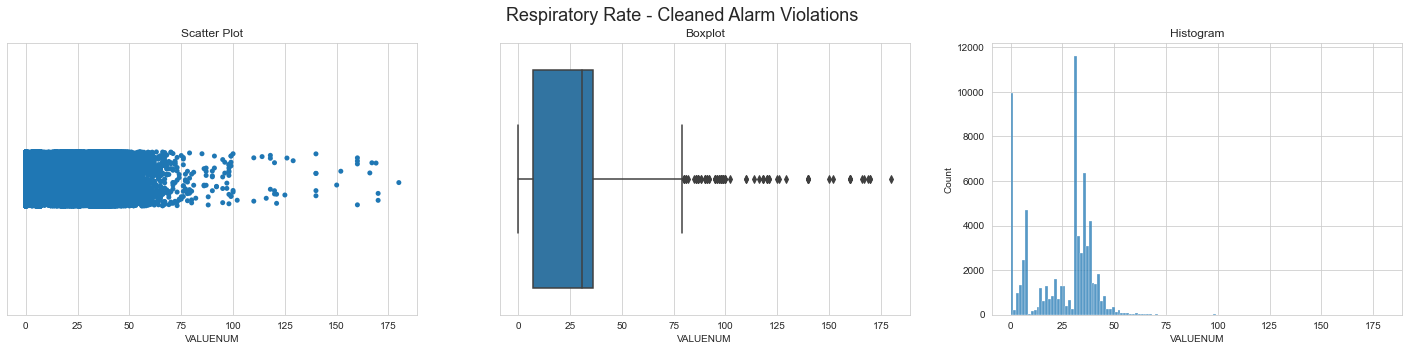

In [10]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.suptitle('Respiratory Rate - Cleaned Alarm Violations', fontsize=18)

sns.stripplot(data=RR_violations_clean, x='VALUENUM', ax=axs[0])
axs[0].set_title('Scatter Plot')
axs[0].set_xlabel('VALUENUM')

sns.boxplot(data=RR_violations_clean, x='VALUENUM', ax=axs[1])
axs[1].set_title('Boxplot')
axs[1].set_xlabel('VALUENUM')

sns.histplot(data=RR_violations_clean, x='VALUENUM', ax=axs[2])
axs[2].set_title('Histogram')
axs[2].set_xlabel('VALUENUM')

plt.show(fig)
# TODO: consider ages!

### Respiratory Rate - Alarm Thresholds

In [11]:
display(RR_violations)

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
74,32059616,262154.0,220210,2105-12-08 05:15:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
75,32059622,262154.0,220210,2105-12-08 05:20:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
76,32059628,262154.0,220210,2105-12-08 05:25:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
77,32059857,262154.0,220210,2105-12-08 21:15:00,7.0,insp/min,32059819,224162,2105-12-08 20:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


In [12]:
# Check respiratory rate alarm - HIGH threshold
RR_threshold_high = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH')]
RR_threshold_high.THRESHOLD_VALUE.describe()

count    43415.000000
mean        30.096672
std          6.978782
min          0.000000
25%         30.000000
50%         30.000000
75%         35.000000
max         55.000000
Name: THRESHOLD_VALUE, dtype: float64

Text(0.5, 1.0, 'HIGH thresholds of Respiratory Rate')

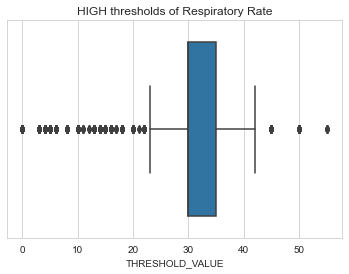

In [13]:
sns.boxplot(data=RR_threshold_high, x='THRESHOLD_VALUE').set_title('HIGH thresholds of Respiratory Rate')

The minimum value of the HIGH alarm thresholds is 0, which should be at least one unit bigger than minimal value 12 and at most 36.

Let's check the suspiciously low HIGH alarm thresholds up to 15.

Text(0.5, 1.0, 'HIGH thresholds of Respiratory Rate up to value of 15')

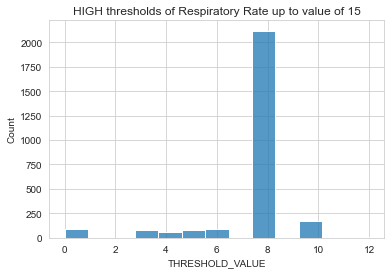

In [14]:
RR_threshold_high_under_15 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] <= 12)]
sns.histplot(data=RR_threshold_high_under_15, x='THRESHOLD_VALUE').set_title('HIGH thresholds of Respiratory Rate up to value of 15')
# Decided to remove them

Text(0.5, 1.0, 'HIGH thresholds of Respiratory Rate with values from 36 onwards')

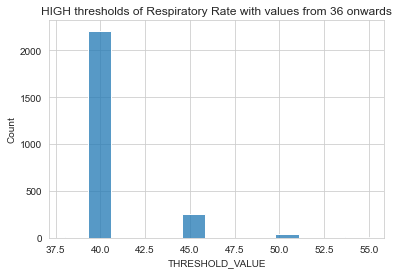

In [15]:
RR_threshold_high_over_36 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] > 36)]
sns.histplot(data=RR_threshold_high_over_36, x='THRESHOLD_VALUE').set_title('HIGH thresholds of Respiratory Rate with values from 36 onwards')
# Decided to keep cluster around 40, because these are a lot of cases which are very close to 36

In [16]:
RR_threshold_high = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] > 12) & (RR_violations['THRESHOLD_VALUE'] <= 40)]
RR_threshold_high.sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_high)
RR_threshold_high.THRESHOLD_VALUE.describe() # ranges from 13 to 40 now

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
79,32059157,262154.0,220210,2105-12-07 12:19:00,34.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
80,32059166,262154.0,220210,2105-12-07 13:00:00,34.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
81,32059183,262154.0,220210,2105-12-07 15:00:00,39.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
82,32059207,262154.0,220210,2105-12-07 17:00:00,41.0,insp/min,32059200,224161,2105-12-07 16:00:00,30.0,HIGH
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


count    40408.000000
mean        31.485077
std          3.756678
min         13.000000
25%         30.000000
50%         30.000000
75%         35.000000
max         40.000000
Name: THRESHOLD_VALUE, dtype: float64

In [17]:
# Check respiratory rate alarm - LOW threshold
RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW')].THRESHOLD_VALUE.describe()

count    2.744600e+04
mean     5.493915e+03
std      2.132923e+05
min      1.000000e+00
25%      8.000000e+00
50%      8.000000e+00
75%      3.500000e+01
max      8.409010e+06
Name: THRESHOLD_VALUE, dtype: float64

In [18]:
# Minimum value of LOW threshold is 1 which should be at least 12
# Maximum value of LOW threshold is 8.409.010 which is higher than the maximal HIGH threshold that is 40
# Check how many values are too high:
RR_threshold_low_min_40 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] >= 40)].sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_low_min_40)
RR_threshold_low_min_40.THRESHOLD_VALUE.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
227832,27800179,219850.0,220210,2173-08-08 14:00:00,15.0,insp/min,27800119,224162,2173-08-08 08:38:00,40.0,LOW
328615,11918571,248363.0,220210,2153-01-16 19:00:00,33.0,insp/min,11918446,224162,2153-01-16 08:00:00,40.0,LOW
187960,25802322,209048.0,220210,2166-07-03 10:00:00,21.0,insp/min,25802301,224162,2166-07-03 08:00:00,40.0,LOW
187959,25802315,209048.0,220210,2166-07-03 09:00:00,22.0,insp/min,25802301,224162,2166-07-03 08:00:00,40.0,LOW
187958,25802286,209048.0,220210,2166-07-03 08:00:00,25.0,insp/min,25802301,224162,2166-07-03 08:00:00,40.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
165488,4930247,202559.0,220210,2152-12-02 15:00:00,16.0,insp/min,4930203,224162,2152-12-02 08:00:00,8309010.0,LOW
241464,9896945,224325.0,220210,2114-04-30 08:00:00,14.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241463,9896935,224325.0,220210,2114-04-30 07:00:00,15.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241462,9896925,224325.0,220210,2114-04-30 06:00:00,14.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW


count    6.482000e+03
mean     2.323126e+04
std      4.384510e+05
min      4.000000e+01
25%      8.500000e+01
50%      8.800000e+01
75%      9.000000e+01
max      8.409010e+06
Name: THRESHOLD_VALUE, dtype: float64

In [19]:
# As a higher LOW values than HIGH values make no sense, LOW values over 40 can be removed:
RR_threshold_low = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] >= 12) & (RR_violations['THRESHOLD_VALUE'] < 40)].sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_low)
RR_threshold_low.THRESHOLD_VALUE.describe() # ranges from 12 to 35 now

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
385671,29734118,261533.0,220210,2167-06-24 05:00:00,10.0,insp/min,29733943,224162,2167-06-23 20:00:00,12.0,LOW
101387,16483485,290237.0,220210,2187-08-02 14:17:00,8.0,insp/min,16483475,224162,2187-08-02 12:00:00,12.0,LOW
118519,2717544,294197.0,220210,2167-04-05 16:08:00,11.0,insp/min,2717438,224162,2167-04-05 08:00:00,12.0,LOW
118518,2717167,294197.0,220210,2167-04-04 13:09:00,11.0,insp/min,2717105,224162,2167-04-04 08:37:00,12.0,LOW
118517,2716935,294197.0,220210,2167-04-04 01:30:00,7.0,insp/min,2716889,224162,2167-04-04 00:21:00,12.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
169952,11878436,203937.0,220210,2115-02-12 20:00:00,20.0,insp/min,11878452,224162,2115-02-12 20:00:00,35.0,LOW
169953,11878473,203937.0,220210,2115-02-12 21:00:00,20.0,insp/min,11878452,224162,2115-02-12 20:00:00,35.0,LOW
169954,11878479,203937.0,220210,2115-02-12 22:00:00,20.0,insp/min,11878452,224162,2115-02-12 20:00:00,35.0,LOW
159970,23377796,201039.0,220210,2145-03-31 03:15:00,24.0,insp/min,23377688,224162,2145-03-31 00:00:00,35.0,LOW


count    1402.000000
mean       32.121969
std         4.272160
min        12.000000
25%        30.000000
50%        35.000000
75%        35.000000
max        35.000000
Name: THRESHOLD_VALUE, dtype: float64

After data cleaning, the lower threshold (LOW) of the respiratory rate ranges from 12 to 35 and the upper threshold (HIGH) ranges from 13 to 40.

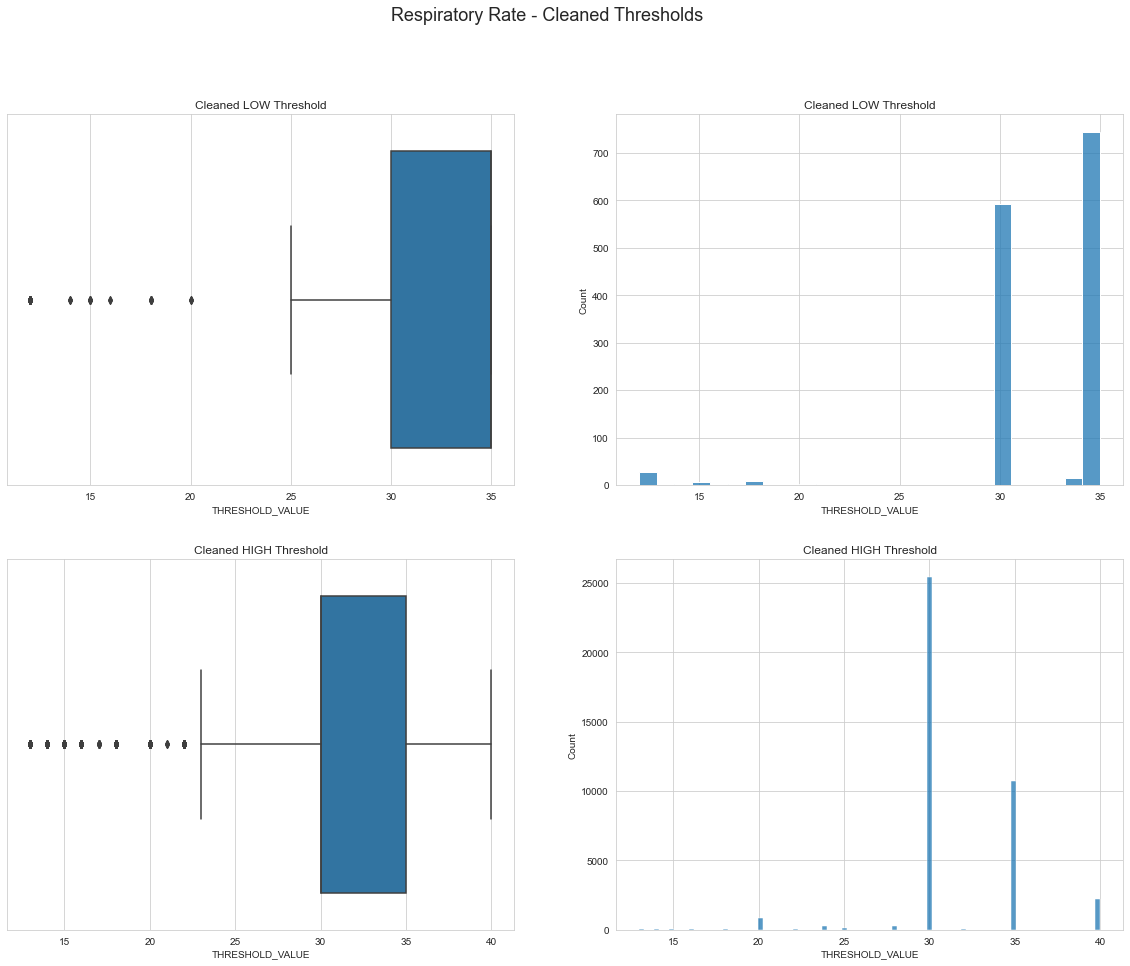

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Respiratory Rate - Cleaned Thresholds', fontsize=18)

sns.boxplot(data=RR_threshold_low, x='THRESHOLD_VALUE', ax=axs[0][0])
axs[0][0].set_title('Cleaned LOW Threshold')
axs[0][0].set_xlabel('THRESHOLD_VALUE')

sns.histplot(data=RR_threshold_low, x='THRESHOLD_VALUE', ax=axs[0][1])
axs[0][1].set_title('Cleaned LOW Threshold')
axs[0][1].set_xlabel('THRESHOLD_VALUE')

sns.boxplot(data=RR_threshold_high, x='THRESHOLD_VALUE', ax=axs[1][0])
axs[1][0].set_title('Cleaned HIGH Threshold')
axs[1][0].set_xlabel('THRESHOLD_VALUE')

sns.histplot(data=RR_threshold_high, x='THRESHOLD_VALUE', ax=axs[1][1])
axs[1][1].set_title('Cleaned HIGH Threshold')
axs[1][1].set_xlabel('THRESHOLD_VALUE')

plt.show(fig)

# TODO: remove LOW threshold over 30?